# King County Home Sales Analysis

Damara Morales

## Business Understanding

Realtor firms in King County, WA have asked me to perform an analysis to see what elements add more value (price/worth) to homes in the area. There are various resources online that show what variables raise the price of a home and how to get the best price for the buyer. However, it's been asked to dig into the given data to see what claims are true for King County and which ones are not. 

## Data Understanding

The CSV data file that was used for this analysis was the 2021-2022 home sales in King County, Washington. The data came with specific descriptions of the columns. The column names and their description can be found on this link: [Column Names and Descriptions for King County Data Set](https://flatiron.illumidesk.com/user/damara305/edit/da-capstone-project-enterprise/data/column_names.md).

After reading the information given on the columns, it was easier to start on the data cleaning and start the analyzing process. This data was interpreted using regression modeling. Linear regression is a simple way to show the correlation between independent variables and a dependent variable. Our dependent variable for this analysis is the "price" of a home and our independent variables are all of the other columns that affect the price. Using regression modeling will help yield findings to support relevant recommendations. 

## Data Preparation

### Loading the Data

In [57]:
import matplotlib.pyplot as plt
import pandas as pd 
import statsmodels.api as sm 
import numpy as np

In [58]:
df = pd.read_csv("./data/kc_house_data.csv")

### Data Exploration

In [60]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


In [4]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'greenbelt', 'nuisance', 'view',
       'condition', 'grade', 'heat_source', 'sewer_system', 'sqft_above',
       'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built',
       'yr_renovated', 'address', 'lat', 'long'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

In [6]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,3.015500e+04,3.015500e+04,30155.000000,30155.000000,30155.000000,3.015500e+04,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000
mean,4.538104e+09,1.108536e+06,3.413530,2.334737,2112.424739,1.672360e+04,1.543492,1809.826098,476.039396,330.211142,217.412038,1975.163953,90.922301,47.328076,-121.317397
std,2.882587e+09,8.963857e+05,0.981612,0.889556,974.044318,6.038260e+04,0.567717,878.306131,579.631302,285.770536,245.302792,32.067362,416.473038,1.434005,5.725475
min,1.000055e+06,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480
25%,2.064175e+09,6.480000e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.405320,-122.326045
50%,3.874011e+09,8.600000e+05,3.000000,2.500000,1920.000000,7.480000e+03,1.500000,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551380,-122.225585
75%,7.287100e+09,1.300000e+06,4.000000,3.000000,2619.500000,1.057900e+04,2.000000,2270.000000,940.000000,510.000000,320.000000,2003.000000,0.000000,47.669913,-122.116205
max,9.904000e+09,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340


Below, I looked at the correlation between the variables and "price" which is our target to be predicted.

In [7]:
df.corr()["price"]

id              -0.034184
price            1.000000
bedrooms         0.289204
bathrooms        0.480401
sqft_living      0.608521
sqft_lot         0.085730
floors           0.180576
sqft_above       0.538651
sqft_basement    0.245058
sqft_garage      0.264169
sqft_patio       0.313409
yr_built         0.096013
yr_renovated     0.084786
lat              0.063632
long            -0.022509
Name: price, dtype: float64

Correlation is a measure related to regression modeling. There seems to be some relevant signal here, with the variables having medium-to-strong correlation with "price".

### Data Cleaning

Now that some data exploration was done, I decided to do a bit of data cleaning before I created my first baseline model. I changed some column names and also removed and added new columns. 

Dropped "id" column since it showed no relevance to modeling. 

In [8]:
df.drop(labels = 'id' , axis = 1, inplace = True)

Checked for missing values and dropped those columns since there wasn't much missing information. It was safe to drop them since those columns didn't have much importance to the data. 

In [9]:
df.isna().sum()/df.shape[0]

date             0.000000
price            0.000000
bedrooms         0.000000
bathrooms        0.000000
sqft_living      0.000000
sqft_lot         0.000000
floors           0.000000
waterfront       0.000000
greenbelt        0.000000
nuisance         0.000000
view             0.000000
condition        0.000000
grade            0.000000
heat_source      0.001061
sewer_system     0.000464
sqft_above       0.000000
sqft_basement    0.000000
sqft_garage      0.000000
sqft_patio       0.000000
yr_built         0.000000
yr_renovated     0.000000
address          0.000000
lat              0.000000
long             0.000000
dtype: float64

In [10]:
df.dropna(subset = ['heat_source' , 'sewer_system'], axis = 0, inplace = True)

Renamed "date" column and changed the format of the date for easier comprehension. 

In [11]:
rnmdate = {'date' : 'selldate'}
df.rename(columns=rnmdate, inplace=True)

In [12]:
df.selldate = df.selldate.apply(lambda x: pd.to_datetime(x, yearfirst = True))

Created a column that shows the age of the house. If the house has been remodeled at some time, the age of the house starts over from that date. 

In [13]:
df['yr_old'] = np.where(df['yr_renovated'] != 0, df.selldate.apply(lambda x: x.year) - df['yr_renovated'],
                          df['selldate'].apply(lambda x: x.year) - df['yr_built'])

Lastly, I created a zip code column, to help easily identify the location of the houses. It looked that in this data all addresses were in the same format and had the same ending; therefore, this strategy was acceptable. 

In [14]:
df.address[0:5]

0    2102 Southeast 21st Court, Renton, Washington ...
1    11231 Greenwood Avenue North, Seattle, Washing...
2    8504 South 113th Street, Seattle, Washington 9...
3    4079 Letitia Avenue South, Seattle, Washington...
4    2193 Northwest Talus Drive, Issaquah, Washingt...
Name: address, dtype: object

In [15]:
df.address[95][-20:-15]

'98053'

In [16]:
df.address[2000][-20:-15]

'98092'

In [17]:
df['zipcode'] = df.address.apply(lambda x: x[-20:-15])

In [18]:
df.head()

,selldate,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,yr_old,zipcode
0,2022-05-24,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,...,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052,53,98055
1,2021-12-13,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,...,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591,71,98133
2,2021-09-29,311000.0,6,2.0,2880,6156,1.0,NO,NO,NO,...,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520,65,98178
3,2021-12-14,775000.0,3,3.0,2160,1400,2.0,NO,NO,NO,...,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020,11,98118
4,2021-08-24,592500.0,2,2.0,1120,758,2.0,NO,NO,YES,...,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188,9,98027


## Modeling

### Simple Baseline Model

To create my first baseline model, I created a filter that has only the numerical columns of the dataset. 

In [19]:
pred_columns = [x for x in df.columns if x not in ['selldate','price', 'waterfront', 'greenbelt', 'nuisance', 'view', 'condition',
                                               'grade', 'heat_source', 'sewer_system', 'address', 'zipcode']]

In [20]:
pred_columns

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'sqft_above',
 'sqft_basement',
 'sqft_garage',
 'sqft_patio',
 'yr_built',
 'yr_renovated',
 'lat',
 'long',
 'yr_old']

I then added the filter to the dataset. I assigned the model features to "preds" (predictors) and assigned price to "target."

In [21]:
preds = df[pred_columns]
target = df.price

In [22]:
y = target
X = preds

model = sm.OLS(y, sm.add_constant(X))
results = model.fit()

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [23]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.416
Method:                 Least Squares   F-statistic:                     1531.
Date:                Sun, 02 Oct 2022   Prob (F-statistic):               0.00
Time:                        07:35:53   Log-Likelihood:            -4.4734e+05
No. Observations:               30111   AIC:                         8.947e+05
Df Residuals:                   30096   BIC:                         8.948e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -5.264e+06   1.57e+06     -3.345      0.001   -8.35e+06   -2.18e+06
bedrooms      -1.669e+05   5461.573    -30.555      0.000   -1.78e+05   -1.56e+05
bathrooms      1.411e+05   8062.571     17.497      0.000    1.25e+05    1.57e+05
sqft_living     335.7764     18.281     18.367      0.000     299.944     371.609
sqft_lot         -0.0916      0.068     -1.353      0.176      -0.224       0.041
floors        -1526.3791   9902.358     -0.154      0.877   -2.09e+04    1.79e+04
sqft_above      287.9607     18.662     15.430      0.000     251.382     324.540
sqft_basement   162.6750     13.690     11.883      0.000     135.843     189.507
sqft_garage    -145.2075     19.089     -7.607      0.000    -182.622    -107.793
sqft_patio      260.6295     17.941     14.527      0.000     225.464     295.795
yr_built       2501.8038    774.053      3.232      0.001     984.627    4018.981
yr_renovated    221.2089     24.497      9.030      0.000     173.194     269.223
lat            3.162e+04   4281.656      7.384      0.000    2.32e+04       4e+04
long           1.167e+04   1076.336     10.844      0.000    9561.854    1.38e+04
yr_old         5941.4099    778.619      7.631      0.000    4415.284    7467.536
==============================================================================
Omnibus:                    43095.522   Durbin-Watson:                   1.855
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         48118495.038
Skew:                           8.069   Prob(JB):                         0.00
Kurtosis:                     198.173   Cond. No.                     2.48e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.48e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The R-squared value gives us the accuracy of the model. Right now it is at a 0.416. The goal is to try to get this number up so we can get the best results for our business problem. The next steps are to add the dummified categorical values and clean the data some more to have an improved final baseline model. 

## Improve Upon the Baseline Model

### Dummify Categorical Values

The next step is to use pd.get_dummies to dummify categorical values and add them to our data. 

In [24]:
cat_columns = ['waterfront', 'greenbelt', 'nuisance', 'view', 'condition', 'grade', 'heat_source','sewer_system']
dummy_df = pd.get_dummies(data = df, columns = cat_columns, drop_first = True)

In [25]:
dummy_df.columns

Index(['selldate', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'sqft_above', 'sqft_basement', 'sqft_garage', 'sqft_patio',
       'yr_built', 'yr_renovated', 'address', 'lat', 'long', 'yr_old',
       'zipcode', 'waterfront_YES', 'greenbelt_YES', 'nuisance_YES',
       'view_EXCELLENT', 'view_FAIR', 'view_GOOD', 'view_NONE',
       'condition_Fair', 'condition_Good', 'condition_Poor',
       'condition_Very Good', 'grade_11 Excellent', 'grade_12 Luxury',
       'grade_13 Mansion', 'grade_2 Substandard', 'grade_3 Poor',
       'grade_4 Low', 'grade_5 Fair', 'grade_6 Low Average', 'grade_7 Average',
       'grade_8 Good', 'grade_9 Better', 'heat_source_Electricity/Solar',
       'heat_source_Gas', 'heat_source_Gas/Solar', 'heat_source_Oil',
       'heat_source_Oil/Solar', 'heat_source_Other',
       'sewer_system_PRIVATE RESTRICTED', 'sewer_system_PUBLIC',
       'sewer_system_PUBLIC RESTRICTED'],
      dtype='object')

In [26]:
df = dummy_df = pd.get_dummies(data = df, columns = cat_columns, drop_first = True)

In [27]:
X=dummy_df.drop(labels =['selldate','price','zipcode','address'], axis=1)
y=dummy_df.price

first_dummy_model = sm.OLS(y,sm.add_constant(X))
results = first_dummy_model.fit()
results.summary()

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.530
Method:                 Least Squares   F-statistic:                     754.6
Date:                Sun, 02 Oct 2022   Prob (F-statistic):               0.00
Time:                        07:35:54   Log-Likelihood:            -4.4405e+05
No. Observations:               30111   AIC:                         8.882e+05
Df Residuals:                   30065   BIC:                         8.886e+05
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                           -2.623e+06   1.42e+06     -1.852      0.064    -5.4e+06    1.52e+05
bedrooms                        -5.647e+04   5166.765    -10.929      0.000   -6.66e+04   -4.63e+04
bathrooms                        9.666e+04   7389.731     13.080      0.000    8.22e+04    1.11e+05
sqft_living                        99.8336     16.921      5.900      0.000      66.667     133.000
sqft_lot                            0.2823      0.065      4.371      0.000       0.156       0.409
floors                          -5.528e+04   9295.295     -5.947      0.000   -7.35e+04   -3.71e+04
sqft_above                        212.8044     17.227     12.353      0.000     179.039     246.570
sqft_basement                     126.6683     12.757      9.929      0.000     101.664     151.673
sqft_garage                      -179.4730     17.727    -10.125      0.000    -214.218    -144.728
sqft_patio                        135.9421     16.639      8.170      0.000     103.330     168.555
yr_built                         1497.4521    696.162      2.151      0.031     132.945    2861.960
yr_renovated                      170.8073     22.095      7.731      0.000     127.501     214.114
lat                                3.3e+04   3845.633      8.580      0.000    2.55e+04    4.05e+04
long                             8601.5715    969.715      8.870      0.000    6700.889    1.05e+04
yr_old                           4369.4434    704.838      6.199      0.000    2987.931    5750.956
waterfront_YES                   7.502e+05   3.29e+04     22.769      0.000    6.86e+05    8.15e+05
greenbelt_YES                   -3649.4669   2.28e+04     -0.160      0.873   -4.83e+04     4.1e+04
nuisance_YES                     5.488e+04   9550.440      5.746      0.000    3.62e+04    7.36e+04
view_EXCELLENT                   6.253e+05   3.35e+04     18.642      0.000     5.6e+05    6.91e+05
view_FAIR                        1.783e+05   4.38e+04      4.068      0.000    9.24e+04    2.64e+05
view_GOOD                       -1005.5181   2.52e+04     -0.040      0.968   -5.05e+04    4.85e+04
view_NONE                       -3.677e+04   1.51e+04     -2.427      0.015   -6.65e+04   -7076.093
condition_Fair                  -8.554e+04   4.19e+04     -2.043      0.041   -1.68e+05   -3466.265
condition_Good                   3.574e+04   9123.261      3.918      0.000    1.79e+04    5.36e+04
condition_Poor                  -1.062e+05   8.22e+04     -1.293      0.196   -2.67e+05    5.48e+04
condition_Very Good              9.607e+04   1.29e+04      7.437      0.000    7.07e+04    1.21e+05
grade_11 Excellent               8.074e+05   3.53e+04     22.865      0.000    7.38e+05    8.77e+05
grade_12 Luxury                  1.822e+06   5.98e+04     30.450      0.000     1.7

Above I ran another model with the dummy values and you can see the R-squared has already gone up a little bit. The R-squared is now at a 0.530.

### Handling Zipcode Column

Next, I'm going to add the zipcode column to the baseline model. A zipcode may appear like its numerical, but in reality it is another categorical column. I will temporary cast it as an integer to visualize the cleaning process better. I will dummy this column at the end and see if it improves our baseline model.  

In [28]:
df.zipcode

0        98055
1        98133
2        98178
3        98118
4        98027
         ...  
30150    98103
30151    98116
30152    98122
30153    98055
30154    98148
Name: zipcode, Length: 30111, dtype: object

<AxesSubplot:xlabel='zipcode'>

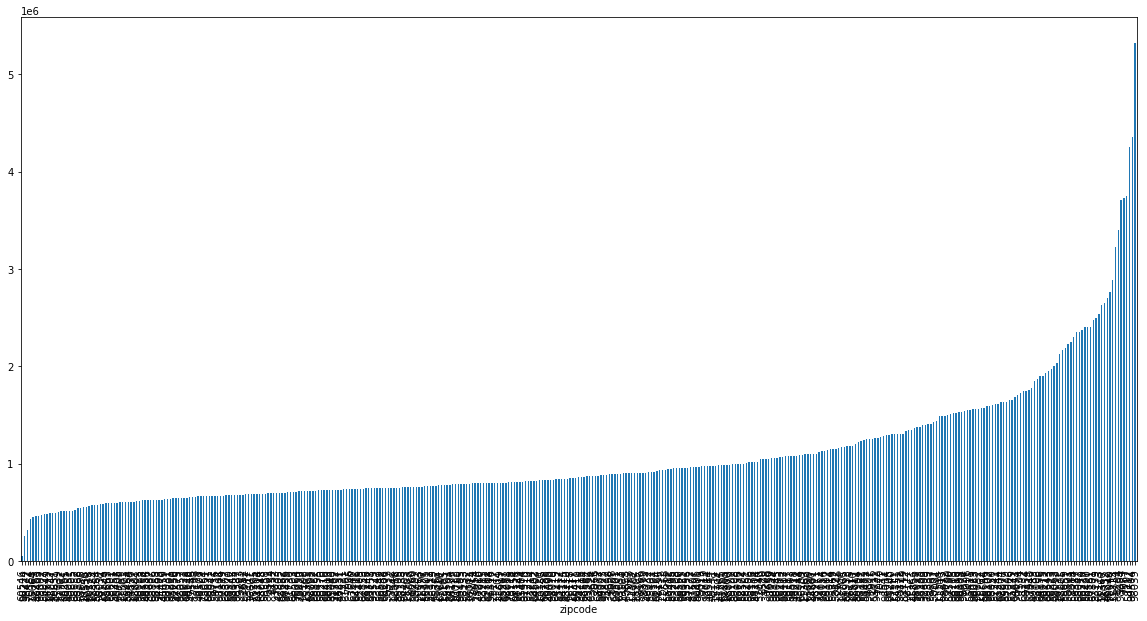

In [29]:
plt.figure(figsize=(20,10))
df.groupby(df.zipcode.astype('int')).price.mean().sort_values(ascending=True).plot(kind='bar')

As you can see the data looks bad and messy. This could mean that there is something wrong with the zipcode information given to us. 

In [30]:
df.zipcode.astype('int').min(), df.zipcode.astype('int').max()

(1541, 99705)

The range of the zipcodes is inaccurate. As we know, that zipcodes in the U.S. are 5-digits. I did a quick research for the zip codes in King County ([info](https://www.zipdatamaps.com/king-wa-county-zipcodes#:~:text=List%20of%20All%20Zipcodes%20in%20King%20County%2C%20Washington,%20%20%20%2043%20more%20rows%20)) and they range between 98000 and 99000. I will create a filter to keep the correct zipcodes in the data.

In [31]:
filter_zips = (df.zipcode.astype('int') >= 98000) & (df.zipcode.astype('int') < 99000)

<AxesSubplot:xlabel='zipcode'>

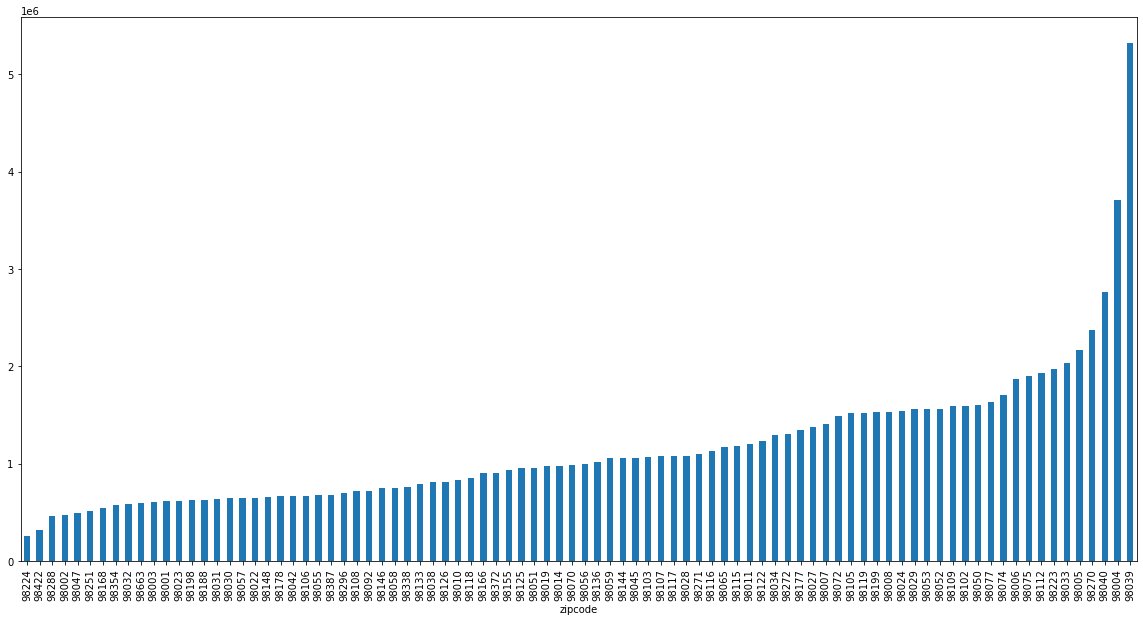

In [32]:
plt.figure(figsize = (20, 10))
df.groupby(df.zipcode[filter_zips]).price.mean().sort_values(ascending= True).plot(kind = 'bar')

In [33]:
df = df[filter_zips]

In [34]:
df.zipcode.astype('int').min(),df.zipcode.astype('int').max()

(98001, 98663)

Now, to dummify the column:

In [35]:
cat_zipcode = ['zipcode']
dummy2_df = pd.get_dummies(data = df, columns = cat_zipcode, drop_first = True)

In [36]:
X = dummy2_df.drop(['selldate', 'price','address'], axis = 1)
y = dummy2_df.price

second_dummy_model = sm.OLS(y, sm.add_constant(X))
results = second_dummy_model.fit()
results.summary()

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     490.9
Date:                Sun, 02 Oct 2022   Prob (F-statistic):               0.00
Time:                        07:35:58   Log-Likelihood:            -4.2451e+05
No. Observations:               29200   AIC:                         8.493e+05
Df Residuals:                   29067   BIC:                         8.504e+05
Df Model:                         132                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                           -1.737e+08   1.97e+07     -8.817      0.000   -2.12e+08   -1.35e+08
bedrooms                        -2.159e+04   4294.587     -5.027      0.000      -3e+04   -1.32e+04
bathrooms                        4.711e+04   6147.044      7.664      0.000    3.51e+04    5.92e+04
sqft_living                        90.8305     13.899      6.535      0.000      63.588     118.073
sqft_lot                            0.5659      0.054     10.574      0.000       0.461       0.671
floors                          -9.129e+04   8524.241    -10.710      0.000   -1.08e+05   -7.46e+04
sqft_above                        242.8219     14.170     17.136      0.000     215.048     270.596
sqft_basement                      75.9215     10.649      7.129      0.000      55.049      96.794
sqft_garage                       -15.0261     15.262     -0.985      0.325     -44.940      14.888
sqft_patio                         74.6217     13.780      5.415      0.000      47.611     101.632
yr_built                          675.5056    571.999      1.181      0.238    -445.639    1796.650
yr_renovated                       59.9866     18.065      3.321      0.001      24.579      95.394
lat                              3.245e+05   1.73e+05      1.875      0.061   -1.47e+04    6.64e+05
long                            -1.288e+06   1.53e+05     -8.396      0.000   -1.59e+06   -9.87e+05
yr_old                            123.3797    576.136      0.214      0.830   -1005.873    1252.632
waterfront_YES                   7.693e+05   2.73e+04     28.222      0.000    7.16e+05    8.23e+05
greenbelt_YES                    4409.2616   1.92e+04      0.230      0.818   -3.32e+04     4.2e+04
nuisance_YES                    -5.261e+04   8068.295     -6.521      0.000   -6.84e+04   -3.68e+04
view_EXCELLENT                   7.072e+05   2.75e+04     25.708      0.000    6.53e+05    7.61e+05
view_FAIR                        9.568e+04   3.62e+04      2.642      0.008    2.47e+04    1.67e+05
view_GOOD                        6.642e+04   2.07e+04      3.210      0.001    2.59e+04    1.07e+05
view_NONE                       -9.006e+04   1.26e+04     -7.155      0.000   -1.15e+05   -6.54e+04
condition_Fair                  -1.339e+05   3.42e+04     -3.916      0.000   -2.01e+05   -6.69e+04
condition_Good                    5.59e+04   7578.543      7.376      0.000     4.1e+04    7.08e+04
condition_Poor                  -3.417e+04   6.69e+04     -0.511      0.609   -1.65e+05    9.69e+04
condition_Very Good              1.196e+05   1.06e+04     11.236      0.000    9.88e+04     1.4e+05
grade_11 Excellent               6.318e+05    2.9e+04     21.792      0.000    5.75e+05    6.89e+05
grade_12 Luxury                  1.494e+06    4.9e+04     30.514      0.000     1.4

Adding the proper zipcode information to our database improved our R-squared significantly. Our R-squared number is now at 0.690. Which is way higher than our initial baseline model, which was at an R-squared of 0.416.

### Working with Lat and Long Data

Finally, I am going to work with the Lat and Long data from our dataframe. I am going to use these numbers to find a correlation between the distance of the houses to the nearest transit centers. Does the distance between a home and public transit affect the price of the home. Being closer to transit can increase the price of the home due to convenience, or it could also decrease it since it will be close to noisy areas. 

I used google maps ([maps](https://www.google.com/maps/search/transit+in+kings+county,+WA/@47.5447242,-122.3585665,10.7z)) to help myself with this part of the data analysis. I started out by creating a dictionary with the information I am going to use.

In [37]:
transit_loc = {'Bellveue': (47.62264245214898, -122.19369572773161),
               'King County Metro East Base': (47.632301575020094, -122.17757206594837),
               'King County Metro East Base #2': (47.63109428227852, -122.17339185733792),
               'Renton Transit Center': (47.48601663787899, -122.20981938951485),
               'King County Metro South Base':(47.50267485263056, -122.28746585654301), 
               'Burien TC': (47.47553087312272, -122.33809085661417),
               '16th Ave SW & SW 116th St': (47.5106499756558, -122.35468260748831),
               'Columbia St & Western Ave': (47.60377589229803, -122.33675538732449),
               'King County Transit Division': (47.60412312110515, -122.33074723915402),
               '4th Ave S & S Washington St' : (47.60273419204765, -122.32894479470288),
               '3rd Ave S & S Main St': (47.60186609265993, -122.33066140846586),
               'Sound Transit': (47.600071974943226, -122.32851564126213),
               'King County Metro Atlantic & Central Base': (47.59140314485634, -122.32548373596713),
               'King County Metro Ryerson Base': (47.59165757344463, -122.32842636505764),
               'King County Metro': (47.59923262678932, -122.33133657707242)}      

In [38]:
len(transit_loc)

15

In [39]:
transit_loc.values()

dict_values([(47.62264245214898, -122.19369572773161), (47.632301575020094, -122.17757206594837), (47.63109428227852, -122.17339185733792), (47.48601663787899, -122.20981938951485), (47.50267485263056, -122.28746585654301), (47.47553087312272, -122.33809085661417), (47.5106499756558, -122.35468260748831), (47.60377589229803, -122.33675538732449), (47.60412312110515, -122.33074723915402), (47.60273419204765, -122.32894479470288), (47.60186609265993, -122.33066140846586), (47.600071974943226, -122.32851564126213), (47.59140314485634, -122.32548373596713), (47.59165757344463, -122.32842636505764), (47.59923262678932, -122.33133657707242)])

I created an array of the lat-long pairs. That way I can use the house locations to calculate the distance to the closest public transportation.

In [40]:
loc_coord = np.array(list(zip(df.lat,df.long)))

I installed the geopy library. This library has functions that calculate geographical distances.

In [41]:
!pip install geopy

In [42]:
import geopy.distance

metro_prox = []

for houseloc in loc_coord:
    sortlist=[]
    for transitloc in transit_loc.values():
        sortlist.append(geopy.distance.great_circle(houseloc, transitloc).miles)
    metro_prox.append(min(sortlist))

In [43]:
metro_prox

[1.8898922384166252,
 7.4979337818912875,
 1.3198572772479398,
 2.399698871102188,
 7.193458776158723,
 11.018514296175086,
 1.942281061981946,
 7.580249002638345,
 12.643171038740107,
 11.976399224137829,
 1.5192485965898426,
 5.098488795980822,
 15.792772784027745,
 12.719448110181679,
 6.296319541082614,
 4.2123015867426155,
 2.7364784316820465,
 4.090835883126345,
 4.139499447558143,
 2.670481358937733,
 11.912647473995523,
 0.7606628509896513,
 10.690766277246384,
 1.7385252099842352,
 5.985710610350775,
 8.902151964639742,
 1.4899780723178953,
 4.199101100153372,
 2.8819987921141847,
 5.1254798158668375,
 8.776658316299685,
 8.787348149525005,
 1.5177660143311513,
 10.151085452062697,
 5.441089873075059,
 1.476951867271451,
 20.6515676395956,
 9.37688248538947,
 12.690913749784299,
 1.3468055501428458,
 4.263096036385363,
 2.324981127711775,
 7.8603132886983405,
 2.703224489578923,
 12.08848580230883,
 5.676742512713395,
 9.81803699688307,
 6.800460243143966,
 12.071896015520698,

In [44]:
min(metro_prox), max(metro_prox)

(0.017712928942116766, 127.99587597242018)

By these results, the closes metro to a home is 0.0177 miles, and the longest distance is 127 miles. I will make a new column in the dataframe with this new information. 

In [45]:
df['metro_prox_mi'] = metro_prox

/tmp/ipykernel_650/4203387896.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['metro_prox_mi'] = metro_prox


In [46]:
df.head()

,selldate,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,...,heat_source_Electricity/Solar,heat_source_Gas,heat_source_Gas/Solar,heat_source_Oil,heat_source_Oil/Solar,heat_source_Other,sewer_system_PRIVATE RESTRICTED,sewer_system_PUBLIC,sewer_system_PUBLIC RESTRICTED,metro_prox_mi
0,2022-05-24,675000.0,4,1.0,1180,7140,1.0,1180,0,0,...,0,1,0,0,0,0,0,1,0,1.889892
1,2021-12-13,920000.0,5,2.5,2770,6703,1.0,1570,1570,0,...,0,0,0,1,0,0,0,1,0,7.497934
2,2021-09-29,311000.0,6,2.0,2880,6156,1.0,1580,1580,0,...,0,1,0,0,0,0,0,1,0,1.319857
3,2021-12-14,775000.0,3,3.0,2160,1400,2.0,1090,1070,200,...,0,1,0,0,0,0,0,1,0,2.399699
4,2021-08-24,592500.0,2,2.0,1120,758,2.0,1120,550,550,...,0,0,0,0,0,0,0,1,0,7.193459


### Adding metro_prox_mi to Model

For my final manipulation, I added the metro_prox_mi column into the baseline model. 

In [47]:
df.metro_prox_mi

0        1.889892
1        7.497934
2        1.319857
3        2.399699
4        7.193459
           ...   
30150    4.188697
30151    3.328872
30152    1.630023
30153    2.703270
30154    2.796787
Name: metro_prox_mi, Length: 29200, dtype: float64

Below, I created a scatter plot to see the correlation between distance to metro and price of home. It is pretty aparent that most of the houses in this data are pretty close to public transportaion except for a few outliers. Most of the houses are around 20 miles or less from the metro. The mean distance to the metro for this house data set is about 7 miles. 
There does seem to be a correlation with price and distance. The the prices seem to be slightly higher the closer a home is to public transportation.

In [48]:
df.metro_prox_mi.mean()

6.854250444954001

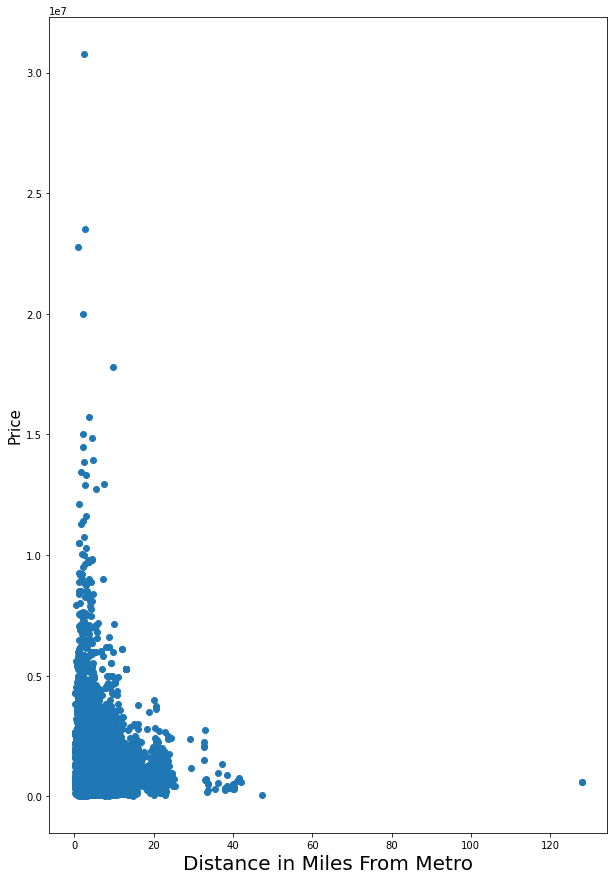

In [49]:
fig, ax = plt.subplots(figsize = (10,15))
x = df['metro_prox_mi']
y = df['price']
plt.scatter(x,y)
ax.set_xlabel('Distance in Miles From Metro', fontsize = 20)
ax.set_ylabel('Price', fontsize = 15);

<AxesSubplot:>

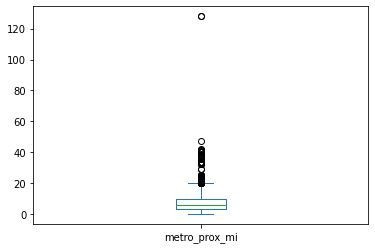

In [50]:
df.metro_prox_mi.plot(kind='box')

I removed the outliers, hoping that it can make a difference to the overall final model. 

In [51]:
df[df.metro_prox_mi < 20]

,selldate,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,...,heat_source_Electricity/Solar,heat_source_Gas,heat_source_Gas/Solar,heat_source_Oil,heat_source_Oil/Solar,heat_source_Other,sewer_system_PRIVATE RESTRICTED,sewer_system_PUBLIC,sewer_system_PUBLIC RESTRICTED,metro_prox_mi
0,2022-05-24,675000.0,4,1.0,1180,7140,1.0,1180,0,0,...,0,1,0,0,0,0,0,1,0,1.889892
1,2021-12-13,920000.0,5,2.5,2770,6703,1.0,1570,1570,0,...,0,0,0,1,0,0,0,1,0,7.497934
2,2021-09-29,311000.0,6,2.0,2880,6156,1.0,1580,1580,0,...,0,1,0,0,0,0,0,1,0,1.319857
3,2021-12-14,775000.0,3,3.0,2160,1400,2.0,1090,1070,200,...,0,1,0,0,0,0,0,1,0,2.399699
4,2021-08-24,592500.0,2,2.0,1120,758,2.0,1120,550,550,...,0,0,0,0,0,0,0,1,0,7.193459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,2021-11-30,1555000.0,5,2.0,1910,4000,1.5,1600,1130,0,...,0,0,0,1,0,0,0,1,0,4.188697
30151,2021-06-16,1313000.0,3,2.0,2020,5800,2.0,2020,0,0,...,0,1,0,0,0,0,0,1,0,3.328872
30152,2022-05-27,800000.0,3,2.0,1620,3600,1.0,940,920,240,...,0,1,0,0,0,0,0,1,0,1.630023
30153,2022-02-24,775000.0,3,2.5,2570,2889,2.0,1830,740,480,...,0,1,0,0,0,0,0,1,0,2.703270


In [52]:
df = df[df.metro_prox_mi < 20]

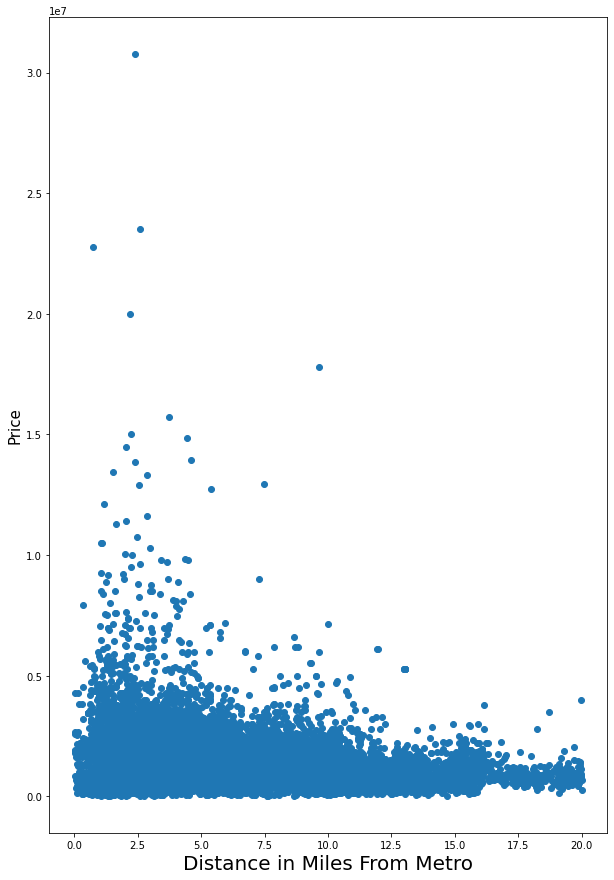

In [53]:
fig, ax = plt.subplots(figsize = (10,15))
x = df['metro_prox_mi']
y = df['price']
plt.scatter(x,y)
ax.set_xlabel('Distance in Miles From Metro', fontsize = 20)
ax.set_ylabel('Price', fontsize = 15);

### Model Iteration

Below I re-ran our dummy2_df model to see if we get any changed in our R-squared value after adding the metro_prox_mi column and fixing its outliers.

In [54]:
cat_zipcode = ['zipcode']
dummy2_df = pd.get_dummies(data = df, columns = cat_zipcode, drop_first = True)

In [55]:
X = dummy2_df.drop(['selldate', 'price','address'], axis = 1)
y = dummy2_df.price

second_dummy_model = sm.OLS(y, sm.add_constant(X))
results = second_dummy_model.fit()

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


## Final Model

In [56]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     512.1
Date:                Sun, 02 Oct 2022   Prob (F-statistic):               0.00
Time:                        07:36:07   Log-Likelihood:            -4.1243e+05
No. Observations:               28351   AIC:                         8.251e+05
Df Residuals:                   28227   BIC:                         8.261e+05
Df Model:                         123                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                           -1.424e+08   2.23e+07     -6.394      0.000   -1.86e+08   -9.87e+07
bedrooms                        -2.212e+04   4387.934     -5.042      0.000   -3.07e+04   -1.35e+04
bathrooms                        4.703e+04   6277.321      7.492      0.000    3.47e+04    5.93e+04
sqft_living                        87.5257     14.178      6.173      0.000      59.736     115.315
sqft_lot                            0.6441      0.062     10.309      0.000       0.522       0.767
floors                          -9.438e+04   8742.216    -10.796      0.000   -1.12e+05   -7.72e+04
sqft_above                        252.5195     14.471     17.450      0.000     224.156     280.883
sqft_basement                      79.9080     10.885      7.341      0.000      58.573     101.243
sqft_garage                       -21.7274     15.724     -1.382      0.167     -52.546       9.091
sqft_patio                         76.2000     14.151      5.385      0.000      48.463     103.937
yr_built                          703.7068    587.580      1.198      0.231    -447.979    1855.392
yr_renovated                       58.5467     18.556      3.155      0.002      22.176      94.917
lat                              3.025e+05   1.81e+05      1.671      0.095   -5.22e+04    6.57e+05
long                             -1.04e+06   1.71e+05     -6.091      0.000   -1.37e+06   -7.05e+05
yr_old                             89.5592    591.664      0.151      0.880   -1070.130    1249.248
waterfront_YES                   8.245e+05   2.87e+04     28.775      0.000    7.68e+05    8.81e+05
greenbelt_YES                    1023.6017   1.96e+04      0.052      0.958   -3.73e+04    3.94e+04
nuisance_YES                    -5.411e+04   8229.985     -6.575      0.000   -7.02e+04    -3.8e+04
view_EXCELLENT                   6.823e+05   2.83e+04     24.092      0.000    6.27e+05    7.38e+05
view_FAIR                        9.123e+04   3.66e+04      2.489      0.013    1.94e+04    1.63e+05
view_GOOD                        7.291e+04   2.15e+04      3.391      0.001    3.08e+04    1.15e+05
view_NONE                       -9.383e+04   1.31e+04     -7.180      0.000   -1.19e+05   -6.82e+04
condition_Fair                  -1.395e+05    3.5e+04     -3.991      0.000   -2.08e+05    -7.1e+04
condition_Good                   5.505e+04   7745.613      7.108      0.000    3.99e+04    7.02e+04
condition_Poor                  -3.665e+04   6.81e+04     -0.538      0.590    -1.7e+05    9.68e+04
condition_Very Good              1.206e+05   1.09e+04     11.083      0.000    9.93e+04    1.42e+05
grade_11 Excellent               6.288e+05   2.94e+04     21.359      0.000    5.71e+05    6.87e+05
grade_12 Luxury                  1.487e+06   4.97e+04     29.937      0.000    1.39

## Regression Results

As the baseling above shows, our final R-squared number is 0.691. Adding that final column in there didn't make the biggest difference, but at least it was a positive difference and not a negative one. You can see that all of the columns are present in the baseline model. This means that they have been dummified correcly, since the catergorical values are also included. Overall the model performed marginally better. We started with an R-squared value of 0.416, so we improved our model by 0.275. 

The columns that we focused on for this model were "metro_prox_mi," which came hand in hand with lat-long, our zipcode and categorical values. Which if you check, these all mostly have a p-value less than 0.05. This tells us that these columns helped us see the correlation between them and price in an accurate way. Having a p-value of less than 0.05 or equal to makes a big difference on our final baseline model. 

## Conclusion

In conclusion, now that we have our final baseline model, we can see what elements add more value to a home, which is our business problem that was presented by the realtor firms. Overall, we can see that zipcode, which can be interpreted as the location of the home (lat-long), can add extreme value. If you look at the coefficient column along with the zipcodes, you can see that some homes go up to 9.438e+05 depending on the zip code. The distance to public transportation also plays a role in this factor, which we can see by our lat-long analysis performed above. As for our categorical data, waterfront had a high coefficient value. Telling us that if the home is at (again, location has a big factor on price in King County) a waterfront, the price of the home will increase. There are specific factors to explain this, but we can conclude that location adds the most value/worth to a home in King, County WA. 